# Kowalski, Analyse 🐧

In [1]:
from astropy.io import fits
from scipy.ndimage import gaussian_filter
import numpy as np
from os import listdir

In [10]:
from matplotlib import pyplot as plt

#A4 tufte layout paper figure sizes
MARGIN_FIG = lambda scale: (1.99, 1.99*scale)
MAIN_FIG = lambda scale: (4.18, 4.18*scale)
FULL_FIG = lambda scale: (6.64, 6.64*scale)

#Fontsize configuration
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', family='Fira Code')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Other matplotlib configuration
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Fira Code'
plt.rcParams['mathtext.it'] = 'Fira Code'
plt.ioff()

In [11]:
gaußians = []

for path in listdir('.'):
  if path.endswith('.csv'):
    data = np.genfromtxt(path, delimiter=',', dtype=int)
    gauß_uncol = data[:,0]
    gauß_uncol = gauß_uncol / np.max(gauß_uncol)
    gauß_lakes = [len(lakes[np.where(lakes != 0)]) for lakes in data]
    gauß_lakes = gauß_lakes / np.max(gauß_lakes)
    gaußians.append((gauß_uncol, gauß_lakes))

In [12]:
#constants!
WATER_LEVELS = np.arange(1, 255, step=1)
WATER_TICKS = [1, 50, 100, 150, 200, 254]
WATER_TICK_LABELS = ["1\n(min)", "50", "100", "150", "200", "254\n(max)"]

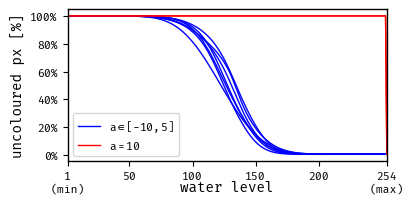

In [17]:
plt.figure(figsize=MAIN_FIG(0.5))
for (uncol, lakes) in gaußians:
  if uncol[100] == 1.0:
    col = 'r'
  else:
    col = 'b'
  plt.plot(WATER_LEVELS, uncol, color=col)

plt.plot([], color='b', label=r'$a\in[-10, 5]$')
plt.plot([], color= 'r', label='$a=10$')
  
plt.yticks([0,0.2,0.4,0.6,0.8,1], ['0%','20%','40%','60%','80%','100%'])
plt.xlabel("water level", labelpad=-10)
plt.ylabel("uncoloured px [%]")
plt.xlim(1, 254)
plt.xticks(WATER_TICKS, WATER_TICK_LABELS)
plt.savefig('../figs/uncoloured_gaußians.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


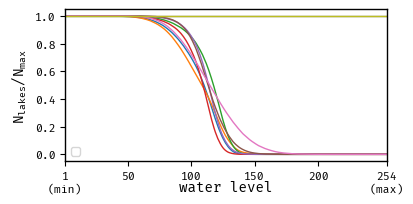

In [14]:
plt.figure(figsize=MAIN_FIG(0.5))
for (uncol, lakes) in gaußians:
  plt.plot(WATER_LEVELS, lakes)
plt.xlabel("water level", labelpad=-10)
plt.ylabel("$N_{lakes}/N_{max}$")
plt.xlim(1, 254)
plt.xticks(WATER_TICKS, WATER_TICK_LABELS)
plt.savefig('../figs/Nlakes_gaußians.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
plt.legend()
plt.show()